In [1]:
# 倒入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图片‘-’显示为方块问题

加载数据

In [3]:
# 加载用户信息
# 指定列名称
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=user_cols)
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [15]:
# 加载电影信息
# 指定列名称
movie_cols = ['movie_id', 'movie_title', 'release_data', 'video_release_data', 'IMDb_URL']
movies = pd.read_csv('ml-100k/u.item', encoding='latin-1', sep='|', names=movie_cols,usecols=range(5))
movies

,movie_id,movie_title,release_data,video_release_data,IMDb_URL
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [4]:
# 加载评分信息
# 指定列名称user id | item id | rating | timestamp
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=rating_cols)
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [19]:
# 合并数据
# 用户和评分合并
users_ratings =  pd.merge(users,ratings)
users_ratings

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


In [20]:
# 用户和评分合并  后的数据 与电影数据进行合并
data = pd.merge(users_ratings, movies)
data

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_data,video_release_data,IMDb_URL
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


基本信息描述

In [21]:
# describe（）
data.describe()

,user_id,age,movie_id,rating,timestamp,video_release_data
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN


<AxesSubplot:ylabel='gender'>

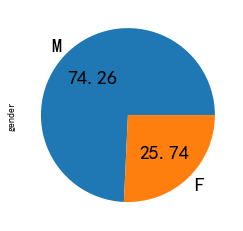

In [25]:
# 统计对电影评分男性女性人数
data['gender'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=20)

In [26]:
# 了解数据  缺值处理
data.shape

(100000, 12)

In [27]:
# 每列是否有缺值
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   age                 100000 non-null  int64  
 2   gender              100000 non-null  object 
 3   occupation          100000 non-null  object 
 4   zip_code            100000 non-null  object 
 5   movie_id            100000 non-null  int64  
 6   rating              100000 non-null  int64  
 7   timestamp           100000 non-null  int64  
 8   movie_title         100000 non-null  object 
 9   release_data        99991 non-null   object 
 10  video_release_data  0 non-null       float64
 11  IMDb_URL            99987 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


In [29]:
data.isnull().sum()

user_id                    0
age                        0
gender                     0
occupation                 0
zip_code                   0
movie_id                   0
rating                     0
timestamp                  0
movie_title                0
release_data               9
video_release_data    100000
IMDb_URL                  13
dtype: int64

In [30]:
# 删除video_release_data
data.dropna(axis=1, how='all', inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   age           100000 non-null  int64 
 2   gender        100000 non-null  object
 3   occupation    100000 non-null  object
 4   zip_code      100000 non-null  object
 5   movie_id      100000 non-null  int64 
 6   rating        100000 non-null  int64 
 7   timestamp     100000 non-null  int64 
 8   movie_title   100000 non-null  object
 9   release_data  99991 non-null   object
 10  IMDb_URL      99987 non-null   object
dtypes: int64(5), object(6)
memory usage: 9.2+ MB


In [32]:
# 查看是否有重复值
data.duplicated().any()

False

评分最多的电影

In [33]:
data

,user_id,age,gender,occupation,zip_code,movie_id,rating,timestamp,movie_title,release_data,IMDb_URL
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...
...,...,...,...,...,...,...,...,...,...,...,...
99995,863,17,M,student,60089,1679,3,889289491,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
99996,863,17,M,student,60089,1678,1,889289570,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
99997,863,17,M,student,60089,1680,2,889289570,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998)
99998,896,28,M,writer,91505,1681,3,887160722,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...


In [38]:
# 获取每部电影的评分次数
# 按照电影标题进行分组统计次数
data.groupby('movie_title')['movie_title'].count().sort_values(ascending=False).head(10)

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: movie_title, dtype: int64

In [41]:
# size（）统计次数
data.groupby('movie_title').size().sort_values(ascending=False).head()

movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

In [46]:
# 或者使用value_counts()
data['movie_title'].value_counts().head(10)

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: movie_title, dtype: int64

<AxesSubplot:>

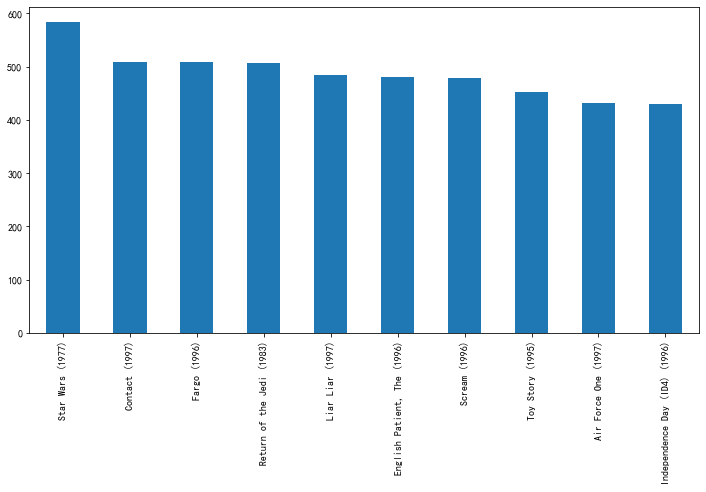

In [48]:
# 绘制图形
data['movie_title'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))

获取评分最高的电影

In [49]:
# 按电影名称进行分组  评分均值
data.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head(10)

movie_title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [51]:
# 获取评分人数
data.groupby('movie_title')['rating'].agg(['count', 'mean']).sort_values(by=['mean', 'count'], ascending=False).head(10)

,count,mean
movie_title,,
Prefontaine (1997),3,5.0
Star Kid (1997),3,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Santa with Muscles (1996),2,5.0
Aiqing wansui (1994),1,5.0
Entertaining Angels: The Dorothy Day Story (1996),1,5.0
"Great Day in Harlem, A (1994)",1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
Someone Else's America (1995),1,5.0


In [52]:
# 评分人数大于100人 获取评分最高的电影
data.groupby('movie_title').agg({'rating':['count', 'mean']})['rating']

,count,mean
movie_title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


In [54]:
data_group = data.groupby('movie_title')['rating'].agg(['count', 'mean'])

In [58]:
# 过滤  评分人数大于100
most_100 = data_group[data_group['count']>100]

In [60]:
# 按照评分均值 再按人数进行降序排序
top_10 = most_100.sort_values(by=['mean', 'count'], ascending=False).head(10)

<AxesSubplot:xlabel='movie_title'>

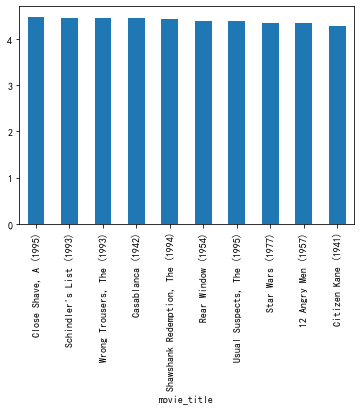

In [61]:
# 使用条形图
top_10['mean'].plot(kind='bar')

评分与年龄的关系

In [62]:
# 年龄的分布
data['age'].describe()

count    100000.000000
mean         32.969850
std          11.562623
min           7.000000
25%          24.000000
50%          30.000000
75%          40.000000
max          73.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

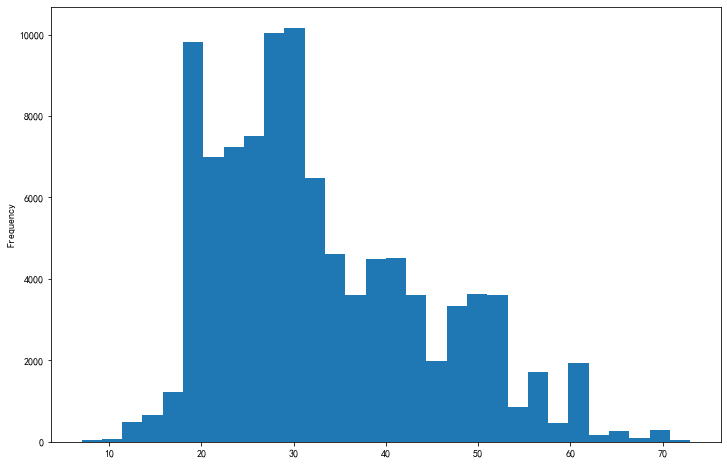

In [65]:
# 绘制直方图
data['age'].plot(kind='hist', bins=30, figsize=(12, 8))

In [67]:
# 自定义区间
pd.cut(data['age'], np.arange(0, 81, 10),right=False)

0        [20, 30)
1        [40, 50)
2        [30, 40)
3        [20, 30)
4        [40, 50)
           ...   
99995    [10, 20)
99996    [10, 20)
99997    [10, 20)
99998    [20, 30)
99999    [20, 30)
Name: age, Length: 100000, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [68]:
# 新增列
data['age_group'] = pd.cut(data['age'], np.arange(0,81,10),right=False)

In [69]:
data['age_group']

0        [20, 30)
1        [40, 50)
2        [30, 40)
3        [20, 30)
4        [40, 50)
           ...   
99995    [10, 20)
99996    [10, 20)
99997    [10, 20)
99998    [20, 30)
99999    [20, 30)
Name: age_group, Length: 100000, dtype: category
Categories (8, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80)]

In [70]:
# 不同年龄分组对评分和人数
data[['age_group', 'rating']]

,age_group,rating
0,"[20, 30)",4
1,"[40, 50)",4
2,"[30, 40)",4
3,"[20, 30)",5
4,"[40, 50)",4
...,...,...
99995,"[10, 20)",3
99996,"[10, 20)",1
99997,"[10, 20)",2
99998,"[20, 30)",3


In [72]:
# 按age_group分组  统计人数  平均评分
data.groupby('age_group')['rating'].agg(['count', 'mean'])
# 年龄越大的分组，对电影评分越高

,count,mean
age_group,,
"[0, 10)",43,3.767442
"[10, 20)",8181,3.486126
"[20, 30)",39535,3.467333
"[30, 40)",25696,3.554444
"[40, 50)",15021,3.591772
"[50, 60)",8704,3.635800
"[60, 70)",2623,3.648875
"[70, 80)",197,3.649746


不同年龄段对某部电影的评分

In [73]:
# 评分次数在前100的电影
most_100 = data['movie_id'].value_counts().head(100)
#获取评分次数前100的movie——id
most_100.index

Int64Index([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121, 174, 127,  56,
              7,  98, 237, 117, 172, 222, 204, 313, 405,  79, 210, 151, 173,
             69, 748, 168, 269, 257, 195, 423,   9, 276, 318,  22, 302,  96,
            328, 118,  25,  15, 183, 216, 176,  64, 234, 202,  28, 191,  89,
            111, 275, 742,  12, 357,  82, 289, 135,  97, 238, 268, 546,  70,
            196, 186, 333, 475, 153, 132, 125, 228, 144, 483, 194, 323, 245,
            197, 185,  11, 282, 496, 568, 301, 655, 265, 182, 273, 143, 471,
            179, 180, 161,  71,  95,   8, 678, 427, 322],
           dtype='int64')

In [76]:
# 将movie_id设置为行索引
data2 = data.set_index('movie_id')
data2

,user_id,age,gender,occupation,zip_code,rating,timestamp,movie_title,release_data,IMDb_URL,age_group
movie_id,,,,,,,,,,,
61,1,24,M,technician,85711,4,878542420,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,"[20, 30)"
61,13,47,M,educator,29206,4,882140552,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,"[40, 50)"
61,18,35,F,other,37212,4,880130803,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,"[30, 40)"
61,58,27,M,programmer,52246,5,884305271,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,"[20, 30)"
61,59,49,M,educator,08403,4,888204597,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,"[40, 50)"
...,...,...,...,...,...,...,...,...,...,...,...
1679,863,17,M,student,60089,3,889289491,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"[10, 20)"
1678,863,17,M,student,60089,1,889289570,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,"[10, 20)"
1680,863,17,M,student,60089,2,889289570,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),"[10, 20)"


In [79]:
# 获取评分次数前100的数据
data_group = data2.loc[most_100.index].groupby(['movie_title', 'age_group'])

In [80]:
# 获取评分均值
data_group['rating'].mean().unstack(1).fillna(0).head(10)

age_group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)"
movie_title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Amadeus (1984),0.0,4.250000,4.067308,4.236842,4.081633,4.230769,4.750000,5.000000
Apocalypse Now (1979),0.0,4.400000,4.050633,4.132353,3.700000,4.187500,4.142857,5.000000
Apollo 13 (1995),4.0,3.954545,3.845455,4.064935,3.822222,4.187500,3.750000,4.000000
Babe (1995),0.0,3.909091,3.894737,4.032258,4.060606,4.150000,4.600000,3.000000
